This notebook is a simplified version of the official [Quick Start guide](https://matplotlib.org/stable/tutorials/introductory/quick_start.html) ([Github version](https://github.com/matplotlib/matplotlib/blob/d9e2c4ba6c37f74cb15f3933edc2b95ebe3e4414/galleries/users_explain/quick_start.py)). It is presented here according to the [Matplotlib license](https://github.com/matplotlib/matplotlib/blob/7c4eb6b02d5cab7205deac38260d42203b18b7a0/LICENSE/LICENSE).


# Quick start guide

This tutorial covers some basic usage patterns and best practices to
help you get started with Matplotlib.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## A simple example

Matplotlib graphs your data on a `Figure` (i.e. a window). Each `Figure` can contain one or more `axes`, an area where points can be specified in terms of x-y coordinates.

The simplest way of creating a Figure with an Axes is using `.pyplot.subplots`. We can then use `.Axes.plot` to draw some data on the Axes:

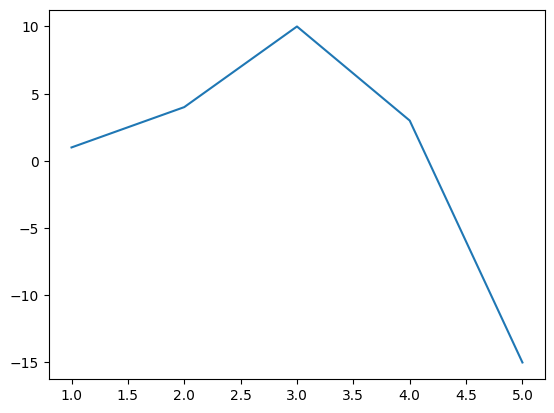

In [2]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4,5], [1, 4, 10, 3,-15])  # Plot some data on the axes.

Note that to get this Figure to display, you may have to call `plt.show()`.

## Parts of a Figure

Here are the components of a Matplotlib Figure.

<img src="../../images/matplotlib_tutorial/anatomy.webp" width="800" height="800">

Text(0, 0.5, 'entry b')

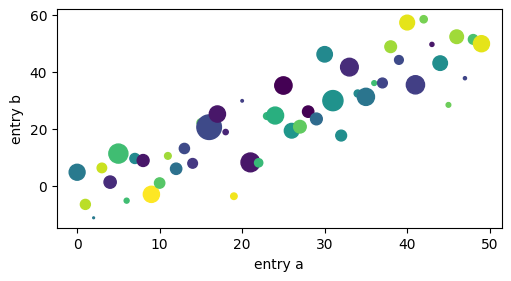

In [3]:
np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')


## Coding styles

### The explicit and the implicit interfaces

There are  two ways to use `Matplotlib`:

- Explicit: create Figures and Axes, and call methods on them (this is also called the "object-oriented (OO) style").  This is the approach we took above.
- Implicit: Rely on `pyplot` to implicitly create and manage the Figures and Axes, and use `pyplot` functions for plotting.


Let's look at one more example of using the explicit OO-style:

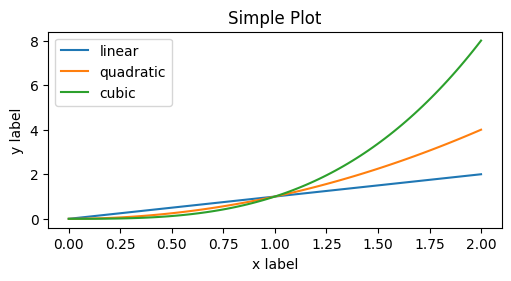

In [4]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

or the pyplot-style:



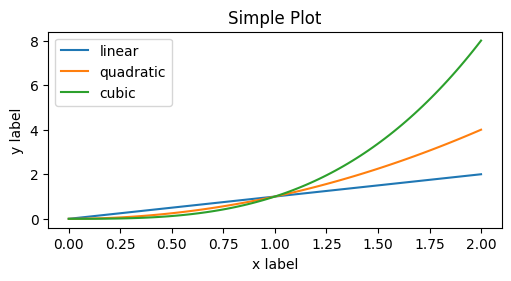

In [5]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

Matplotlib's documentation and examples use both the OO and the pyplot styles.
In general, we suggest using the OO style, particularly for complicated plots, and functions and scripts that are intended to be reused
as part of a larger project. However, the pyplot style can be very convenient for quick interactive work.

Generating some data for the plots below:

In [6]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets

## Styling

Most plotting methods have styling options, accessible either
when a plotting method is called, or from a "setter" on the Artist class.  In the
plot below we manually set the *color*, *linewidth*, and *linestyle* of the
Artists created by `Axes.plot`, and we set the linestyle of the second line
after the fact with `Line2D.set_linestyle`.

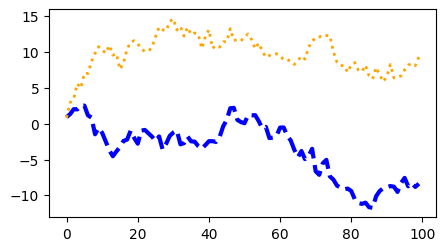

In [7]:
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':')

### Colors

Matplotlib has a very flexible array of colors that are accepted for most Artists. 
Some Artists will take multiple colors.  i.e. for a `scatter` plot, the edge of the markers can be different colors from the interior:



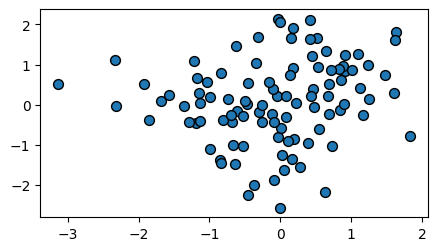

In [8]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor='C0', edgecolor='k')

### Linewidths, linestyles, and markersizes

Line widths are typically in typographic points (1 pt = 1/72 inch) and
available for Artists that have stroked lines.  Similarly, stroked lines
can have a linestyle.


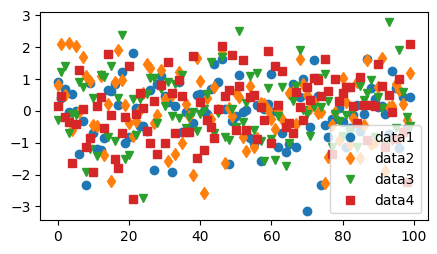

In [9]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend()

## Labelling plots

### Axes labels and text

`Axes.set_xlabel`, `Axes.set_ylabel`, and `Axes.set_title` are used to
add text in the indicated locations. Text can also be directly added to plots using
`~.Axes.text`:

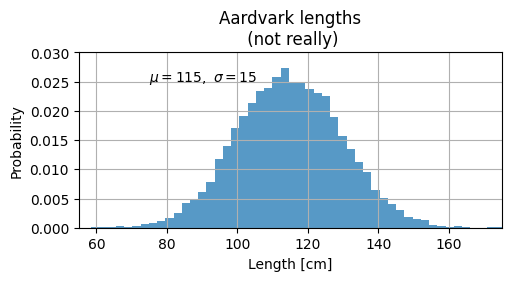

In [10]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True)

Just as with lines above, you can customize the properties by
passing keyword arguments into the text functions::

  t = ax.set_xlabel('my data', fontsize=14, color='red')

### Using mathematical expressions in text

Matplotlib accepts TeX equation expressions in any text expression.
For example to write the expression $\sigma_i=15$ in the title,
you can write a TeX expression surrounded by dollar signs::

    ax.set_title(r'$\sigma_i=15$')

where the ``r`` preceding the title string signifies that the string is a
*raw* string and not to treat backslashes as python escapes.
Matplotlib has a built-in TeX expression parser and
layout engine, and ships its own math fonts



### Annotations

We can also annotate points on a plot, often by connecting an arrow pointing
to *xy*, to a piece of text at *xytext*:

(-2.0, 2.0)

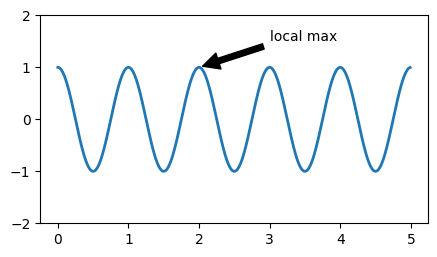

In [11]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2)

In this basic example, both *xy* and *xytext* are in data coordinates.
There are a variety of other coordinate systems one can choose.


### Legends

Often we want to identify lines or markers with a `.Axes.legend`:


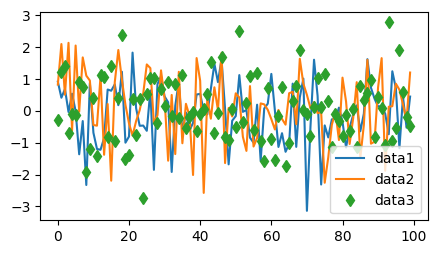

In [12]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend()

Legends in Matplotlib are quite flexible in layout, placement, and what
Artists they can represent.

## Axis scales and ticks

Each Axes has two (or three) `Axis` objects representing the x- and
y-axis. These control the *scale* of the Axis, the tick *locators* and the
tick *formatters*. Additional Axes can be attached to display further Axis
objects.

### Scales

In addition to the linear scale, Matplotlib supplies non-linear scales,
such as a log-scale.  Since log-scales are used so much there are also
direct methods like `Axes.loglog`, `Axes.semilogx`, and
`Axes.semilogy`.

Here we set the scale manually:



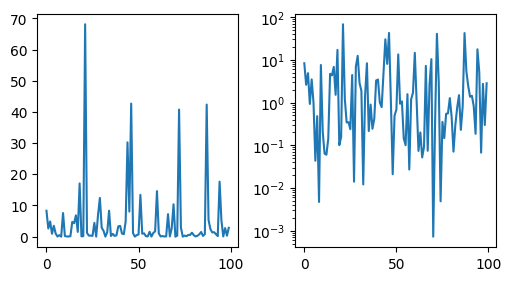

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout='constrained')
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data)

The scale sets the mapping from data values to spacing along the Axis.

### Tick locators and formatters

Each Axis has a tick *locator* and *formatter* that choose where along the
Axis objects to put tick marks.  A simple interface to this is
`~.Axes.set_xticks`:

Text(0.5, 1.0, 'Manual ticks')

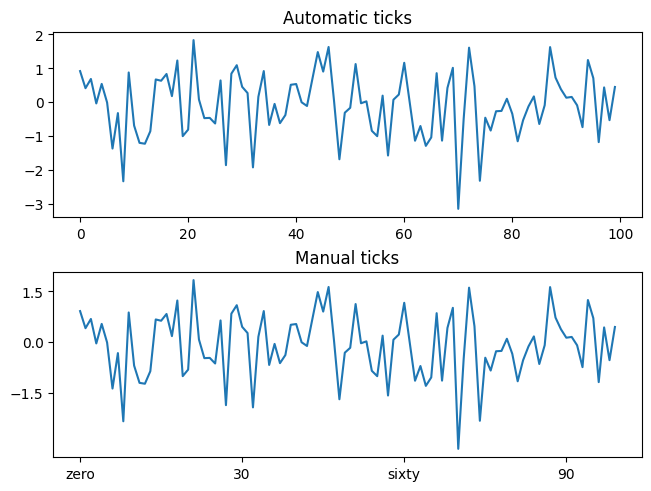

In [14]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title('Manual ticks')

### Plotting dates and strings

Matplotlib can handle plotting arrays of dates and arrays of strings, as
well as floating point numbers.  These get special locators and formatters
as appropriate.  For dates:



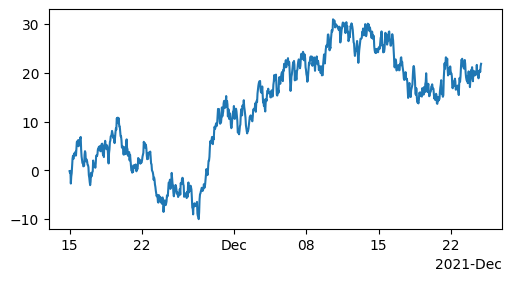

In [15]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                  np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf)

For strings, we get categorical plotting:



<BarContainer object of 4 artists>

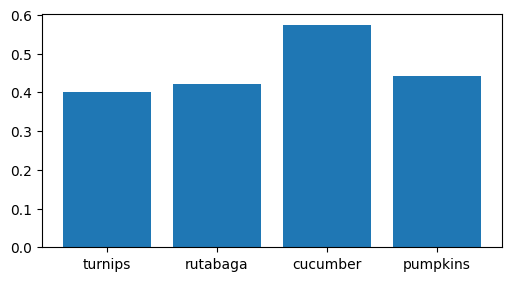

In [16]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
categories = ['turnips', 'rutabaga', 'cucumber', 'pumpkins']

ax.bar(categories, np.random.rand(len(categories)))

## Working with multiple Figures and Axes

You can open multiple Figures with multiple calls to
``fig = plt.figure()`` or ``fig2, ax = plt.subplots()``.  By keeping the
object references you can add Artists to either Figure.

Multiple Axes can be added a number of ways, but the most basic is
``plt.subplots()`` as used above.  One can achieve more complex layouts,
with Axes objects spanning columns or rows, using `~.pyplot.subplot_mosaic`.



The easiest way to create a new Figure is with pyplot:

```python
   fig = plt.figure()  # an empty figure with no Axes
   fig, ax = plt.subplots()  # a figure with a single Axes
   fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
   # a figure with one axes on the left, and two on the right:
   fig, axs = plt.subplot_mosaic([['left', 'right-top'], ['left', 'right_bottom]])
```

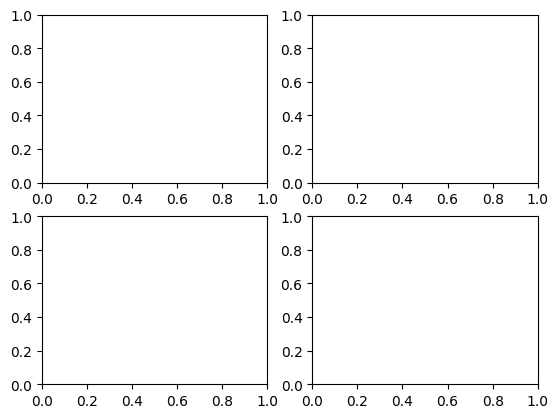

In [17]:
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

Text(0.5, 1.0, 'right')

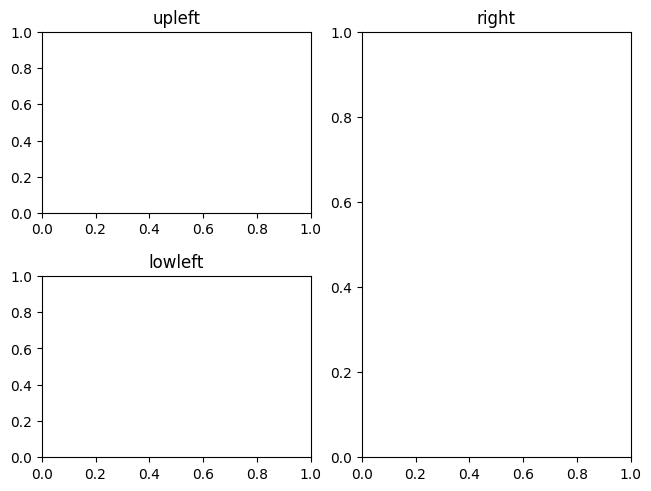

In [18]:
fig, axd = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']], layout='constrained')
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right')

## Further reading

See Matplotlib  [Quick Start guide](https://matplotlib.org/stable/tutorials/introductory/quick_start.html) guide for further links
